In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Administrator\OneDrive\Documents\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',errors = 'ignore',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
target = df.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [11]:
inputs = df.drop('Survived',axis='columns',errors = 'ignore')
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [13]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [15]:
inputs.Sex = inputs.Sex.map({'male':1,'female':2})

In [17]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size = 0.2)

In [21]:
len(x_train)

712

In [22]:
len(x_test)

179

In [23]:
from sklearn import tree 
model= tree.DecisionTreeClassifier()

In [24]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
model.score(x_test,y_test)

0.8379888268156425

In [26]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [27]:
# accuracy test
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       109
           1       0.83      0.74      0.78        70

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [28]:
# accuracy train
y_train_pred = model.predict(x_train)
y_train_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [29]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       449
           1       0.96      0.99      0.97       263

    accuracy                           0.98       712
   macro avg       0.97      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



[Text(0.5898768538135594, 0.9736842105263158, 'Sex <= 1.5\ngini = 0.472\nsamples = 712\nvalue = [440.0, 272.0]\nclass = 0'),
 Text(0.3748675847457627, 0.9210526315789473, 'Age <= 9.5\ngini = 0.319\nsamples = 461\nvalue = [369, 92]\nclass = 0'),
 Text(0.22139830508474576, 0.868421052631579, 'Pclass <= 2.5\ngini = 0.473\nsamples = 26\nvalue = [10, 16]\nclass = 1'),
 Text(0.2129237288135593, 0.8157894736842105, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = 1'),
 Text(0.2298728813559322, 0.8157894736842105, 'Fare <= 20.825\ngini = 0.484\nsamples = 17\nvalue = [10, 7]\nclass = 0'),
 Text(0.22139830508474576, 0.7631578947368421, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = 1'),
 Text(0.23834745762711865, 0.7631578947368421, 'Fare <= 31.331\ngini = 0.165\nsamples = 11\nvalue = [10, 1]\nclass = 0'),
 Text(0.2298728813559322, 0.7105263157894737, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = 0'),
 Text(0.2468220338983051, 0.7105263157894737, 'Fare <= 35.538\ngini = 0.278\nsamples = 

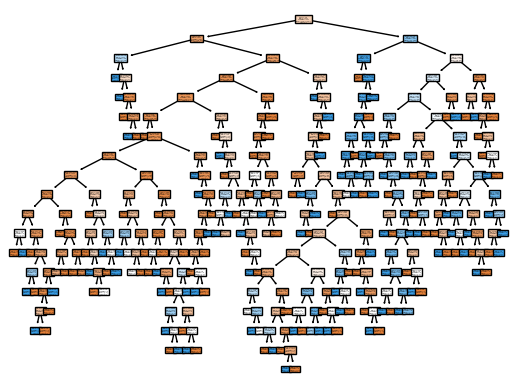

In [34]:
from sklearn import tree 
tree.plot_tree(model,feature_names=list(inputs.columns),class_names=['0','1'],filled = True)

In [35]:
# nitialize RandomForestClassifier

In [45]:
inputs

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,2,38.000000,71.2833
2,3,2,26.000000,7.9250
3,1,2,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,2,19.000000,30.0000
888,3,2,29.699118,23.4500
889,1,1,26.000000,30.0000


In [47]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [49]:
# nitialize RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [57]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_pred = rf_classifier.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score, classification_report

In [65]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [67]:
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       109
           1       0.92      0.81      0.86        70

    accuracy                           0.90       179
   macro avg       0.90      0.88      0.89       179
weighted avg       0.90      0.90      0.90       179



In [71]:
sample = x_test.iloc[0:1]  # Keep as DataFrame to match model input format
prediction = rf_classifier.predict(sample)

In [73]:
sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Did Not Survive'}")


Sample Passenger: {'Pclass': 3.0, 'Sex': 1.0, 'Age': 28.0, 'Fare': 7.7958}
Predicted Survival: Did Not Survive
